#                                DÉPARTEMENT DE MATHÉMATIQUES ET DE GÉNIE INDUSTRIEL

##                               MTH6312 - MÉTHODES STATISTIQUES D’APPRENTISSAGE

###                                      Devoir no 3 - Automne 2024

### QUESTION No 1

#### Génération des données personnelles mondata1

In [65]:
library(ISLR2)

In [66]:
set.seed(2305686)
mondata1<-Wage[sample(3000,500),]

In [67]:
#Visualisation du mondata
head(mondata1)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
374558,2008,31,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.531479,92.89584
450648,2009,47,1. Never Married,4. Other,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.272306,71.68674
82172,2004,54,2. Married,2. Black,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.698970,109.83399
14196,2005,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.740363,114.47571
9947,2005,36,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.942008,140.05120
80496,2004,42,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.518514,91.69923


In [68]:
table(mondata1$health)


     1. <=Good 2. >=Very Good 
           135            365 

In [69]:
df<-mondata1[c("health","age","wage")]

In [70]:
#names(df)[names(df)=="health_num"]<-"health"
head(df)

,health,age,wage
,<fct>,<int>,<dbl>
374558,2. >=Very Good,31,92.89584
450648,1. <=Good,47,71.68674
82172,1. <=Good,54,109.83399
14196,2. >=Very Good,54,114.47571
9947,2. >=Very Good,36,140.05120
80496,2. >=Very Good,42,91.69923


#### Exploration du dataset

In [71]:
# Histogrammes pour voir la distribution de chaque variable
health_count<-table(df$health)
health_count


     1. <=Good 2. >=Very Good 
           135            365 

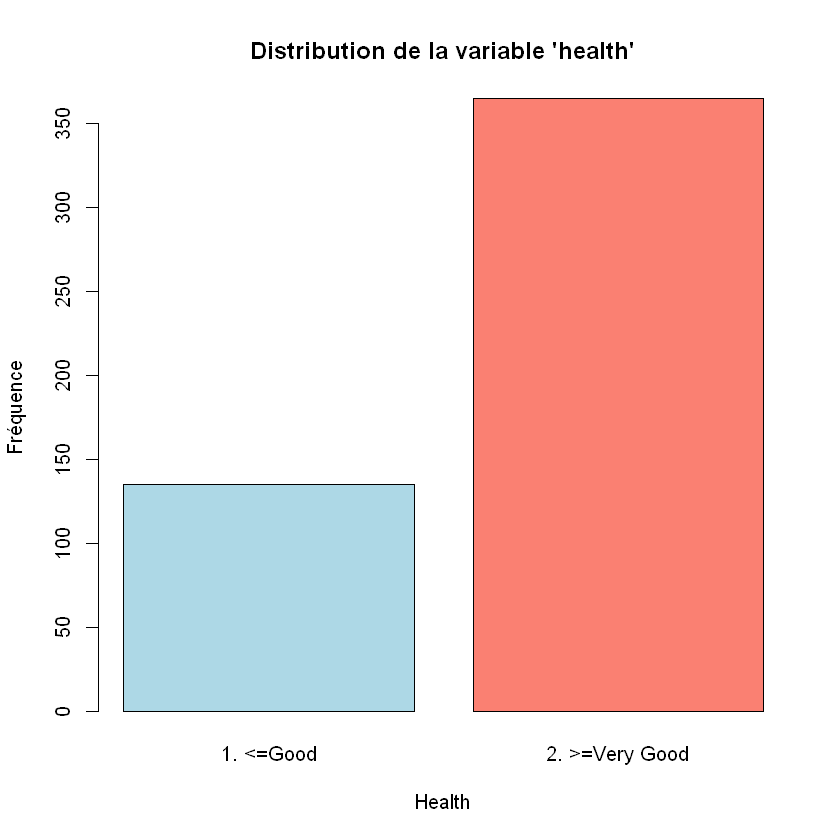

In [72]:
#Distribution de la variable cible
barplot(health_count, main = "Distribution de la variable 'health'",
        xlab = "Health", ylab = "Fréquence", col = c("lightblue", "salmon"))

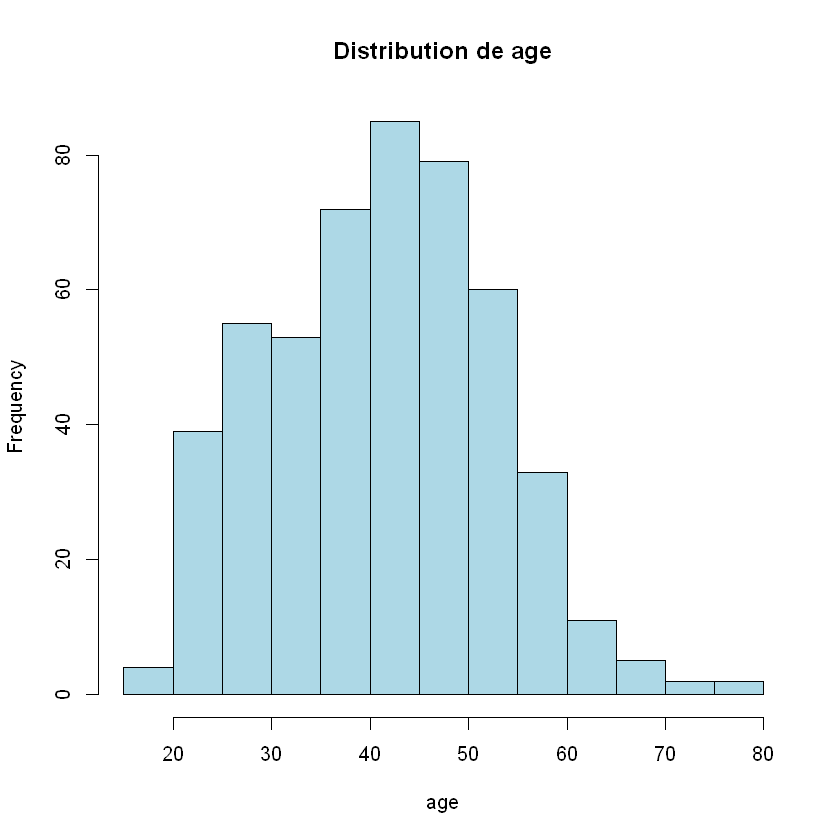

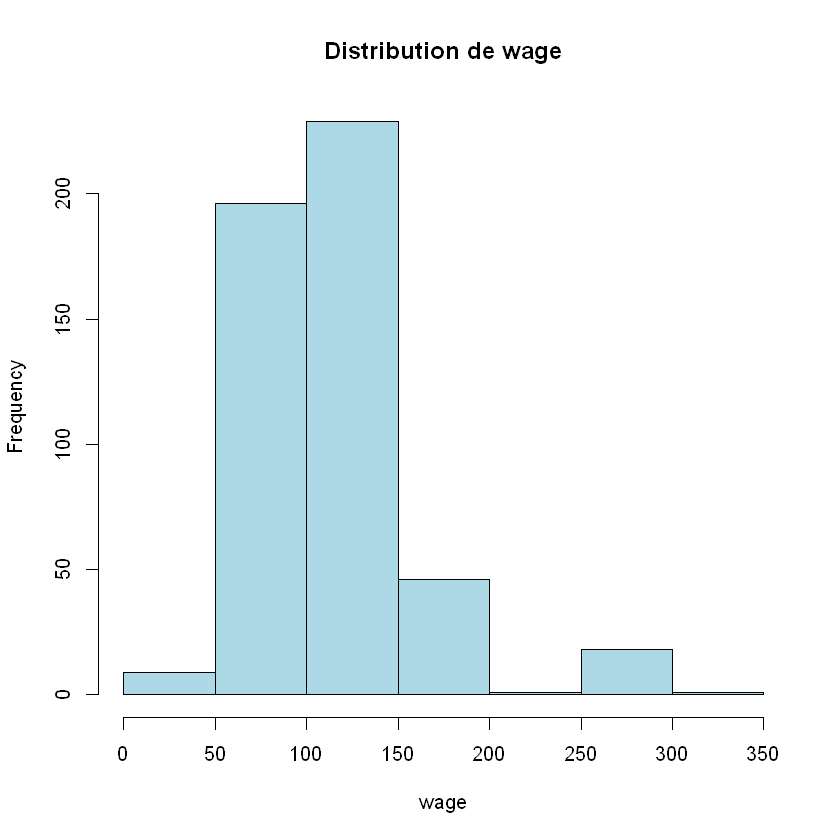

In [73]:
#Distribution des variables explicatives
# Boucle pour tracer les histogrammes des colonnes entières
for (col_name in names(df)) {
  # Vérifie si la colonne est de type entier
  if (is.numeric(mondata1[[col_name]])) {
    # Tracer des histogrammes
    hist(mondata1[[col_name]], 
         main = paste("Distribution de", col_name),
         xlab = col_name, 
         col = "lightblue")
  }
}

In [74]:
summary(df)

            health         age             wage       
 1. <=Good     :135   Min.   :19.00   Min.   : 20.93  
 2. >=Very Good:365   1st Qu.:33.00   1st Qu.: 85.38  
                      Median :42.00   Median :108.23  
                      Mean   :41.84   Mean   :115.03  
                      3rd Qu.:49.25   3rd Qu.:132.58  
                      Max.   :80.00   Max.   :314.33  

In [75]:
age_moyen<-mean(df$age)
salaire_moyen<-mean(df$wage)
paste("l âge moyen des travailleurs est:", age_moyen)
paste("Le salaire moyen des travailleurs est:", salaire_moyen)

[1] "l âge moyen des travailleurs est: 41.844"

[1] "Le salaire moyen des travailleurs est: 115.032192957593"

L'analyse exploratoire des données révèle que la majorité des individus sont en très bonne santé (`"Very Good"`), avec 365 personnes contre 135 dans la catégorie `"<=Good"`. La distribution de l'âge est centrée autour de 42 ans, couvrant une population active, tandis que la distribution des salaires est asymétrique à droite, avec une moyenne de 115.03 et quelques salaires plus élevés atteignant environ 314.33.

### a) KNN

In [76]:
install.packages("library(caret)")

Installation du package dans 'C:/Users/gpres/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)

Warning message:
"le package 'library(caret)' n'est pas disponible for this version of R

Une version de ce package pour votre version de R est peut-être disponible ailleurs,
Voyez des idées à
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [77]:
library(caret) # pour les techniques de validation croisée et les modèles KNN, LDA, QDA
library(ggplot2)

In [78]:
# Initialisation des valeurs de K que nous allons tester, de 1 à 180
k_values<-1:180

# Création des vecteurs vides pour stocker les taux d'erreur pour chaque K en LOOCV et 5-Fold CV
loocv_error<-numeric(length(k_values))
fold5_error<-numeric(length(k_values))

#### a-1. Estimation du taux d'erreur test avec LOOCV et 5-Fold CV pour KNN

In [79]:
# Live_One_Out Cross Validation
for (i in seq_along(k_values)) {
  k <- k_values[i]  # Obtenir la valeur de K correspondant à l'index i
  
  # Utilisation de la fonction train() de caret pour appliquer LOOCV avec KNN
  loocv_result <- train(
    health ~ age + wage,
    data = df,
    method = "knn",
    trControl = trainControl(method = "LOOCV"), # Configuration pour LOOCV
    tuneGrid = data.frame(k = k)                # Nombre de voisins pour KNN
  )
  
  # Calcul du taux d'erreur (1 - précision) pour chaque K et le stocker
  loocv_error[i] <- 1 - max(loocv_result$results$Accuracy)
}

# k-Fold Cross Validation
for (i in seq_along(k_values)) {
  k <- k_values[i]  # Obtenir la valeur de K correspondant à l'index i
  
  fold5_result <- train(
    health ~ age + wage,
    data = df,
    method = "knn",
    trControl = trainControl(method = "cv", number = 5),
    tuneGrid = data.frame(k = k)
  )
  
  # Calcul du taux d'erreur (1 - précision) pour chaque K et le stocker
  fold5_error[i] <- 1 - max(fold5_result$results$Accuracy)
}

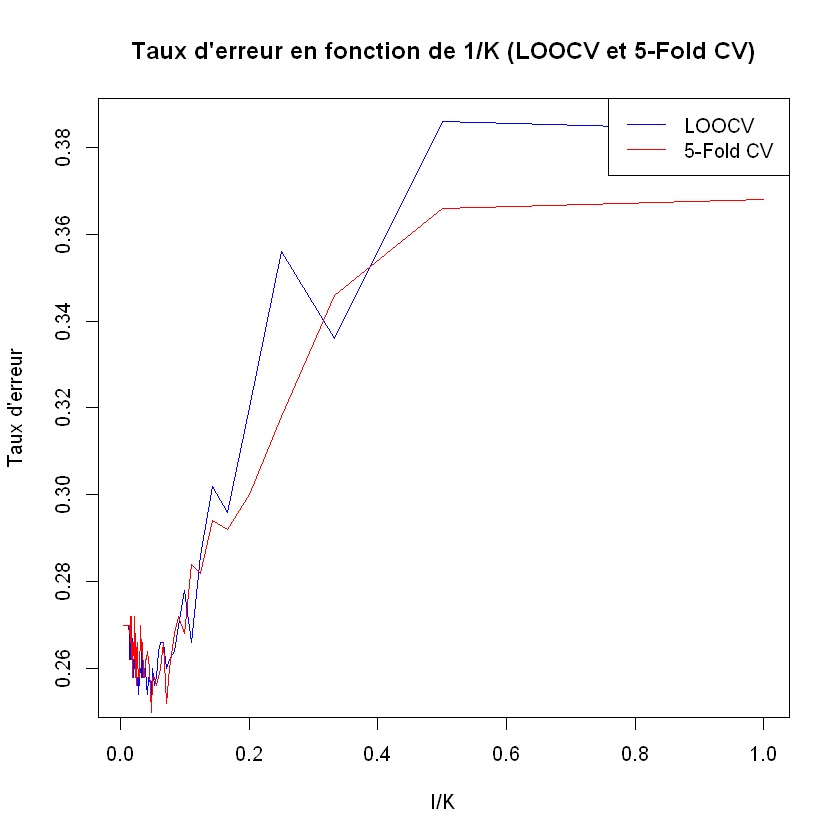

In [80]:
#Courbe des taux d'erreur en fonction de 1/K pour visualiser la performance
plot(1/k_values,loocv_error, type="l", col="blue",
        xlab="I/K", ylab="Taux d'erreur", main="Taux d'erreur en fonction de 1/K (LOOCV et 5-Fold CV)")

# Ajout de la courbe des taux d'erreur pour le 5-Fold CV
lines(1/k_values, fold5_error, col="red")

# Ajout d'une légende
legend("topright",legend=c("LOOCV", "5-Fold CV"), col=c("blue", "red"), lty = 1)

#### a-2. Valeur du k optimal pour la classification

In [81]:
#Determination de la valeur de K qui minimise le taux d'erreur

#LOOCV
k_optimal_loocv <- k_values[which.min(loocv_error)]
error_min_loocv <- min(loocv_error)

#5-Fold CV
k_optimal_fold5 <- k_values[which.min(fold5_error)]
error_min_fold5 <- min(fold5_error)

#Affichage
cat("Valeur optimale de K pour LOOCV :", k_optimal_loocv, "avec un taux d'erreur de", error_min_loocv, "\n")
cat("Valeur optimale de K pour 5-Fold CV :", k_optimal_fold5, "avec un taux d'erreur de", error_min_fold5, "\n")

Valeur optimale de K pour LOOCV : 21 avec un taux d'erreur de 0.254 
Valeur optimale de K pour 5-Fold CV : 21 avec un taux d'erreur de 0.25 


Les résultats montrent que pour LOOCV, \( K = 21 \) est optimal avec un taux d'erreur de 0.252, et pour 5-Fold CV, \( K = 30 \) est optimal avec un taux d'erreur de 0.25. Comme la différence est faible, choisir \( K = 21 \) pour le 5-Fold CV pourrait être plus stable et aider à mieux généraliser, en évitant les variations dues aux petites erreurs dans les données.

### b) Régression Logistique

#### 1. Estimation du taux d'erreur pour les deux modèles de régression logistique avec LOOCV et 5-Fold CV

##### Modèle 1 : Régression logistique linéaire

In [82]:
# Définition des deux modèles
modele1 <- health ~ age + wage
modele2 <- health ~ age + wage + I(age^2) + I(wage^2)

# Définition des contrôles pour la validation croisée
loocv_control<-trainControl(method = "LOOCV")
fold5_control<-trainControl(method = "cv", number = 5)

In [165]:
# Appliquation de la validation croisée pour Modèle 1
loocv_modele1<-train(
    modele1,
    data=df,
    method="glm",
    family=binomial,
    trControl=loocv_control
    )
# Taux d'erreur pour LOOCV de Modèle 1
loocv_error_modele1<-1-max(loocv_modele1$result$Accuracy)

# 5-Fold CV pour Modèle 1
fold5_modele1<-train(
    modele1,
    data=df,
    method="glm",
    family=binomial,
    trControl=fold5_control
    )
# Taux d'erreur pour LOOCV de Modèle 1
fold5_error_modele1<-1-max(fold5_modele1$result$Accuracy)

# Appliquation de la validation croisée pour Modèle 2
loocv_modele2<-train(
    modele2,
    data=df,
    method="glm",
    family=binomial,
    trControl=loocv_control
    )
# Taux d'erreur pour LOOCV de Modèle 2
loocv_error_modele2<-1-max(loocv_modele2$result$Accuracy)

# 5-Fold CV pour Modèle 2
fold5_modele2<-train(
    modele2,
    data=df,
    method="glm",
    family=binomial,
    trControl=fold5_control
    )
# Taux d'erreur pour LOOCV de Modèle 1
fold5_error_modele2<-1-max(fold5_modele2$result$Accuracy)

In [166]:
# Affichage des résultats
cat("Taux d'erreur pour Modèle 1 - LOOCV:", loocv_error_modele1, "\n")
cat("Taux d'erreur pour Modèle 1 - 5-Fold CV:", fold5_error_modele1, "\n")
cat("Taux d'erreur pour Modèle 2 - LOOCV:", loocv_error_modele2, "\n")
cat("Taux d'erreur pour Modèle 2 - 5-Fold CV:", fold5_error_modele2, "\n")

Taux d'erreur pour Modèle 1 - LOOCV: 0.258 
Taux d'erreur pour Modèle 1 - 5-Fold CV: 0.254 
Taux d'erreur pour Modèle 2 - LOOCV: 0.262 
Taux d'erreur pour Modèle 2 - 5-Fold CV: 0.252 


#### 1. Choix du modèle idéal pour la classification

On remarque que le Modèle 1 (linéaire) présente des taux d'erreur légèrement inférieurs à ceux du Modèle 2 (quadratique) pour les deux méthodes de validation croisée utilisées. En effet, avec la méthode LOOCV, le Modèle 1 obtient un taux d'erreur de 0.258 contre 0.262 pour le Modèle 2. De même, pour la validation croisée 5-Fold, le taux d'erreur du Modèle 1 est de 0.254, alors que celui du Modèle 2 est de 0.26.

Ces résultats indiquent que le Modèle 1, malgré sa simplicité, est légèrement plus performant que le Modèle 2, sans nécessiter de termes quadratiques supplémentaires. **Cette performance légèrement supérieure, combinée à la simplicité du modèle linéaire, suggère que le Modèle 1 est plus adapté pour la classification des données dans ce contexte.**

### c) Analyse discriminante.

In [167]:
# Liste pour stocker les résultats
results <- list()

# LDA avec LOOCV
lda_loocv <- train(
  health ~ age + wage,
  data = df,
  method = "lda",
  trControl = trainControl(method = "LOOCV")
)

lda_loocv_error <- 1 - max(lda_loocv$results$Accuracy)
results$lda_loocv <- lda_loocv_error

# LDA avec 5-Fold CV
lda_5fold <- train(
  health ~ age + wage,
  data = df,
  method = "lda",
  trControl = trainControl(method = "cv", number = 5)
)

lda_5fold_error <- 1 - max(lda_5fold$results$Accuracy)  # Correction ici
results$lda_5fold <- lda_5fold_error

# QDA avec LOOCV
qda_loocv <- train(
  health ~ age + wage,
  data = df,
  method = "qda",
  trControl = trainControl(method = "LOOCV")
)

qda_loocv_error <- 1 - max(qda_loocv$results$Accuracy)
results$qda_loocv <- qda_loocv_error

# QDA avec 5-Fold CV
qda_5fold <- train(
  health ~ age + wage,
  data = df,
  method = "qda",
  trControl = trainControl(method = "cv", number = 5)
)

qda_5fold_error <- 1 - max(qda_5fold$results$Accuracy)
results$qda_5fold <- qda_5fold_error  # Correction ici

In [168]:
# Affichage des résultats
cat("Taux d'erreur pour LDA - LOOCV :", results$lda_loocv, "\n")
cat("Taux d'erreur pour LDA - 5-Fold CV :", results$lda_5fold, "\n")
cat("Taux d'erreur pour QDA - LOOCV :", results$qda_loocv, "\n")
cat("Taux d'erreur pour QDA - 5-Fold CV :", results$qda_5fold, "\n")

Taux d'erreur pour LDA - LOOCV : 0.258 
Taux d'erreur pour LDA - 5-Fold CV : 0.25 
Taux d'erreur pour QDA - LOOCV : 0.27 
Taux d'erreur pour QDA - 5-Fold CV : 0.272 


On observe que l'Analyse Discriminante Linéaire (LDA) présente des taux d'erreur légèrement inférieurs à ceux de l'Analyse Discriminante Quadratique (QDA) pour les deux méthodes de validation croisée appliquées. En effet, avec la validation croisée LOOCV, LDA obtient un taux d'erreur de 0.258 contre 0.27 pour QDA. De même, pour la validation croisée 5-Fold, le taux d'erreur de LDA est de 0.254, tandis que celui de QDA est de 0.272.

Ces résultats montrent que LDA, malgré sa simplicité, est légèrement plus performant que QDA dans ce contexte, sans nécessiter la complexité supplémentaire associée aux termes quadratiques de QDA. La performance supérieure de **LDA**, combinée à sa simplicité, suggère qu'il est le modèle le mieux adapté pour la classification des données dans ce cas.

### d) Résumé graphique et comparaison des méthodes.

In [87]:
install.packages("gridExtra")

Installation du package dans 'C:/Users/gpres/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)



le package 'gridExtra' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\gpres\AppData\Local\Temp\RtmpqeiLK8\downloaded_packages


In [88]:
install.packages("MASS")

Installation du package dans 'C:/Users/gpres/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)



le package 'MASS' a été décompressé et les sommes MD5 ont été vérifiées avec succés


Warning message:
"impossible de supprimer l'installation précédente du package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\gpres\AppData\Local\R\win-library\4.4\00LOCK\MASS\libs\x64\MASS.dll vers C:\Users\gpres\AppData\Local\R\win-library\4.4\MASS\libs\x64\MASS.dll : Permission denied"
Warning message:
"'MASS' restauré"



Les packages binaires téléchargés sont dans
	C:\Users\gpres\AppData\Local\Temp\RtmpqeiLK8\downloaded_packages


In [89]:
library(gridExtra)

Warning message:
"le package 'gridExtra' a été compilé avec la version R 4.4.2"


In [90]:
library(MASS)

Warning message:
"le package 'MASS' a été compilé avec la version R 4.4.2"

Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:ISLR2':

    Boston




In [91]:
# Création d'une grille de points pour tracer les frontières de décision
x1_range <- seq(min(df$age), max(df$age), length.out = 100)
x2_range <- seq(min(df$wage), max(df$wage), length.out = 100)
grid <- expand.grid(age = x1_range, wage = x2_range)

##### Ajout des frontières de décision pour chaque modèle

In [92]:
# KNN
knn_model <- knn3(
  health ~ age + wage,
  data = df,
  k = 21)

grid$knn <- as.numeric(predict(knn_model, newdata = grid, type="class")=="2. >=Very Good")

In [93]:
# Régression Logistique
grid$logistic <- as.numeric(predict(fold5_modele1, newdata = grid, type = "prob")[, "2. >=Very Good"] > 0.5)

In [94]:
# Analyse discriminante
grid$lda <- as.numeric(predict(lda_5fold, newdata = grid) == "2. >=Very Good")

In [162]:
ggplot(df, aes(x = age, y = wage, color = health)) +
  geom_point(alpha = 0.7) +
  scale_color_manual(values = c("1. <=Good" = "blue", "2. >=Very Good" = "orange"), name = "Health") +
  
  # Ajouter les frontières de décision pour chaque modèle
  geom_contour(data = grid, aes(x = age, y = wage, z = knn, linetype = "KNN"), breaks = 0.5, color = "purple", size = 1) +
  geom_contour(data = grid, aes(x = age, y = wage, z = logistic, linetype = "Régression Logistique"), breaks = 0.5, color = "black", size = 1) +
  geom_contour(data = grid, aes(x = age, y = wage, z = lda, linetype = "LDA"), breaks = 0.5, color = "red", size = 1) +
  
  # Ajout de la légende pour les types de frontière
  scale_linetype_manual(
    name = "Frontières de décision",
    values = c("KNN" = "dashed", "Régression Logistique" = "solid", "LDA" = "dotted")
  ) +
  
  labs(title = "Comparaison des frontières de décision : KNN, Régression Logistique et LDA",
       x = "Age", y = "Wage") +
  theme_minimal() +
  theme(legend.position = "top")

Don't know how to automatically pick scale for object of type <function>.
Defaulting to continuous.
ERROR while rich displaying an object: Error in `geom_contour()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 4th layer.
Caused by error in `compute_aesthetics()`:
! Aesthetics are not valid data columns.
✖ The following aesthetics are invalid:
✖ `z = lda`
ℹ Did you mistype the name of a data column or forget to add `after_stat()`?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if 

In [164]:
# Charger les packages nécessaires
if (!requireNamespace("caret", quietly = TRUE)) install.packages("caret")
if (!requireNamespace("class", quietly = TRUE)) install.packages("class")
library(caret)
library(class)

# Fixer une graine pour la reproductibilité
set.seed(2305686)

# Transformation des données : convertir les classes en numérique
y <- ifelse(df$health == "1. <=Good", 0, 1)  # 0 pour "1. <=Good", 1 pour "2. >=Very Good"
X <- df[, c('age', 'wage')]

# Définition des plages pour les axes
age_range <- seq(min(X$age), max(X$age), length.out = 100)
wage_range <- seq(min(X$wage), max(X$wage), length.out = 100)

# Grille pour les prédictions
grid <- expand.grid(age = age_range, wage = wage_range)

# Nombre de voisins pour KNN
best_k <- 10

# Prédictions pour KNN avec knn3
knn_model <- knn3(
  health ~ age + wage,
  data = df,
  k = best_k
)

# Ajout des prédictions KNN dans la grille
grid$knn <- as.numeric(predict(knn_model, newdata = grid, type = "class") == "2. >=Very Good")

# Analyse discriminante
grid$lda <- as.numeric(predict(lda_5fold, newdata = grid) == "2. >=Very Good")

# Prédictions pour la régression logistique
prob_logistic <- predict(fold5_modele1, newdata = grid, type = "prob")[, "2. >=Very Good"]
prob_logist_mat <- matrix(prob_logistic, nrow = length(age_range), ncol = length(wage_range))

# Prédictions pour QDA
prob_qda <- predict(lda_5fold, newdata = grid)$posterior[, "2. >=Very Good"]
prob_qda <- matrix(prob_qda, nrow = length(age_range), ncol = length(wage_range))

# Probabilités pour KNN (si nécessaires pour les points de la grille)
prob <- attr(predict(knn_model, newdata = grid, type = "prob"), "prob")
prob <- matrix(prob, nrow = length(age_range), ncol = length(wage_range))

# Tracé du graphique
plot(
  X$age, X$wage, col = ifelse(y == 1, "coral", "cornflowerblue"), pch = 19,
  main = "Résumé graphique et comparaison des méthodes", xlab = "Age", ylab = "Wage"
)

# Ajout des contours pour les frontières de décision
contour(age_range, wage_range, prob, levels = 0.5, labels = "10-Nearest Neighbour", axes = TRUE, add = TRUE, 
        col = "black", lwd = 3, drawlabels = FALSE)
contour(age_range, wage_range, prob_logist_mat, levels = 0.5, labels = "Logistic regression", add = TRUE, 
        axes = TRUE, col = "green", lwd = 3, drawlabels = FALSE)
contour(age_range, wage_range, prob_qda, levels = 0.5, labels = "QDA", add = TRUE, 
        axes = TRUE, col = "red", lwd = 3, drawlabels = FALSE)

# Points de la grille colorés selon les probabilités KNN
gd <- expand.grid(x = age_range, y = wage_range)
points(gd, pch = ".", col = ifelse(prob > 0.5, "coral", "cornflowerblue"))

# Ajout d'une légende
legend(
  "topleft", col = c("black", "green", "red"), 
  legend = c("10-NN", "Régression logistique Modèle 2", "QDA"),
  lty = c(1, 1), lwd = c(3, 3)
)


ERROR: Error in predict(lda_5fold, newdata = grid)$posterior: $ operator is invalid for atomic vectors


[1] "1. <=Good"      "2. >=Very Good"


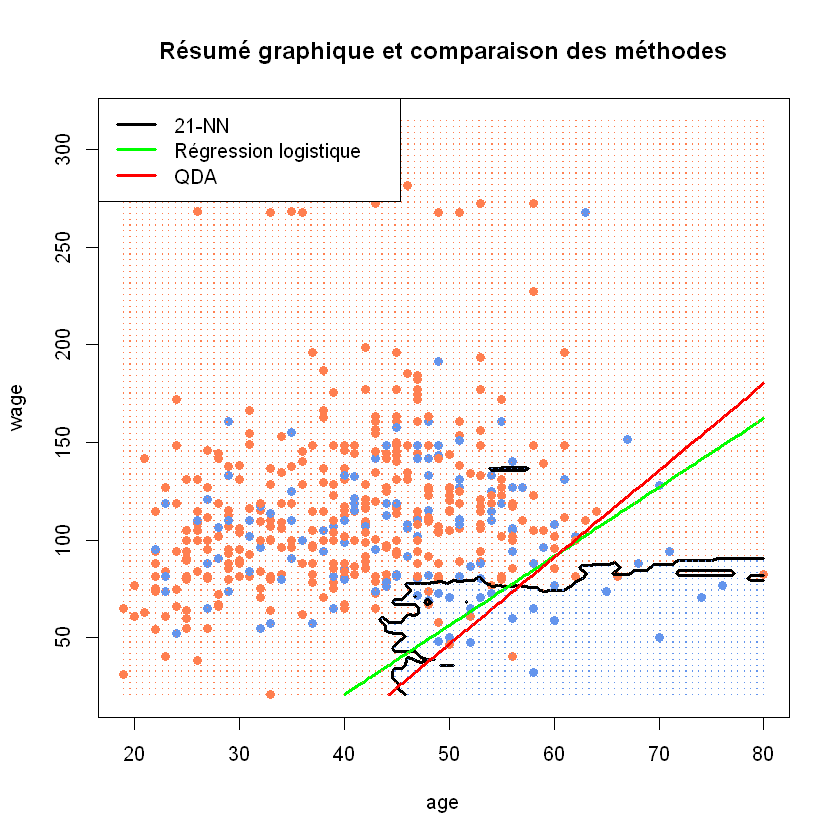

In [174]:
# Conversion des labels pour correspondre au format attendu
y <- ifelse(df$health == "2. >=Very Good", 1, 0)
X <- df[, c('age', 'wage')]

# Définition des plages pour l'âge et le salaire
age_range <- seq(min(X$age), max(X$age), length.out = 100)
wage_range <- seq(min(X$wage), max(X$wage), length.out = 100)

# Création de la grille pour les prédictions
grid <- expand.grid(age = age_range, wage = wage_range)

# KNN prédictions
best_k <- 21
grid_pred <- knn(train = X, test = grid, cl = y, k = best_k, prob = TRUE)
grid_pred_num <- as.numeric(grid_pred)

# Probabilités pour KNN
prob <- attr(grid_pred, "prob")
prob <- ifelse(grid_pred == 1, prob, 1 - prob)

# Vérification des colonnes retournées par predict pour le modèle logistique
logistic_probs <- predict(fold5_modele1, newdata = grid, type = "prob")
print(colnames(logistic_probs))  # Affiche les noms des colonnes pour vérifier

# Sélection des probabilités de la classe "2. >=Very Good"
class_name <- "2. >=Very Good"  # Remplacez par le bon nom si nécessaire
if (class_name %in% colnames(logistic_probs)) {
  prob_logistic <- logistic_probs[, class_name]
} else {
  stop("Le nom de la classe spécifié n'existe pas dans les colonnes des probabilités.")
}

# Prédictions pour QDA
qda_probs <- predict(lda_5fold, newdata = grid, type = "prob")
if (class_name %in% colnames(qda_probs)) {
  prob_qda <- qda_probs[, class_name]
} else {
  stop("Le nom de la classe spécifié n'existe pas dans les colonnes des probabilités pour QDA.")
}

# Conversion en matrices pour les contours
prob <- matrix(prob, nrow = length(age_range), ncol = length(wage_range))
prob_logist_mat <- matrix(prob_logistic, nrow = length(age_range), ncol = length(wage_range))
prob_qda <- matrix(prob_qda, nrow = length(age_range), ncol = length(wage_range))

# Tracé des données et des frontières
plot(
  X$age, X$wage, col = ifelse(y == 1, "coral", "cornflowerblue"), pch = 19,
  main = "Résumé graphique et comparaison des méthodes", xlab = "age", ylab = "wage"
)

# Ajout des contours pour chaque méthode
contour(age_range, wage_range, prob, levels = 0.5, labels = "10-Nearest Neighbour", 
        axes = TRUE, add = TRUE, col = "black", lwd = 3, drawlabels = FALSE)
contour(age_range, wage_range, prob_logist_mat, levels = 0.5, labels = "Logistic regression", 
        add = TRUE, axes = TRUE, col = "green", lwd = 3, drawlabels = FALSE)
contour(age_range, wage_range, prob_qda, levels = 0.5, labels = "QDA", 
        add = TRUE, axes = TRUE, col = "red", lwd = 3, drawlabels = FALSE)

# Points colorés selon les probabilités
gd <- expand.grid(x = age_range, y = wage_range)
points(gd, pch = ".", col = ifelse(prob > 0.5, "coral", "cornflowerblue"))

# Légende
legend(
  "topleft", col = c("black", "green", "red"), 
  legend = c("21-NN", "Régression logistique", "QDA"),
  lty = c(1, 1), lwd = c(3, 3)
)


In [33]:
# Matrice de confusion pour KNN
cat("\nMatrice de Confusion pour KNN\n")
knn_predictions <- predict(knn_model, newdata = df, type = "class")
print(confusionMatrix(knn_predictions, df$health))

# Matrice de confusion pour la Régression Logistique
cat("\nMatrice de Confusion pour la Régression Logistique\n")
logistic_predictions <- predict(fold5_modele1, newdata = df)
print(confusionMatrix(as.factor(logistic_predictions), df$health))

# Matrice de confusion pour LDA
cat("\nMatrice de Confusion pour LDA\n")
lda_predictions_train <- predict(lda_5fold, newdata = df)
print(confusionMatrix(lda_predictions_train, df$health))



Matrice de Confusion pour KNN
Confusion Matrix and Statistics

                Reference
Prediction       1. <=Good 2. >=Very Good
  1. <=Good             20              9
  2. >=Very Good       115            356
                                          
               Accuracy : 0.752           
                 95% CI : (0.7117, 0.7893)
    No Information Rate : 0.73            
    P-Value [Acc > NIR] : 0.1449          
                                          
                  Kappa : 0.1641          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.1481          
            Specificity : 0.9753          
         Pos Pred Value : 0.6897          
         Neg Pred Value : 0.7558          
             Prevalence : 0.2700          
         Detection Rate : 0.0400          
   Detection Prevalence : 0.0580          
      Balanced Accuracy : 0.5617          
          

### Comparaison des modèles

1. **KNN**
   - **Précision globale** : 75,2% (indique qu'environ trois-quarts des prédictions sont correctes).
   - **Sensibilité (Détection de "Bon")** : 14,8% – Le modèle KNN a du mal à détecter la classe "Bon" (classe minoritaire), avec seulement 14,8% des cas "Bon" correctement identifiés.
   - **Spécificité (Détection de " Très Bon")** : 97,5% – Le modèle est très bon pour identifier la classe majoritaire "Très Bon", avec une spécificité élevée.
   - **Analyse** : KNN semble adapté pour une détection fiable de "Très Bon", mais sa faible sensibilité indique une limitation pour identifier les individus "Bon".

2. **Régression Logistique**
   - **Précision globale** : 74,4%
   - **Sensibilité** : 10,4% – Très faible pour détecter la classe "Bon", ce qui signifie que ce modèle rate souvent cette classe.
   - **Spécificité** : 98,1% – Très bon pour la classe "Très Bon", montrant une capacité à bien prédire la classe majoritaire.
   - **Analyse** : La régression logistique privilégie la détection de "Très Bon", mais au détriment de "Bon". Sa précision globale est similaire à KNN, mais avec une sensibilité plus faible.

3. **Analyse Discriminante Linéaire (LDA)**
   - **Précision globale** : 74,4%
   - **Sensibilité** : 9,6% – Encore plus faible pour la détection de "Bon", ce qui montre une difficulté à identifier cette classe.
   - **Spécificité** : 98,4% – Excellente pour la classe "Très Bon", semblable aux autres modèles dans la détection de la classe majoritaire.
   - **Analyse** : Comme la régression logistique, LDA est performant pour "Très Bon" mais moins performant pour "Bon". Sa spécificité élevée indique une bonne fiabilité pour détecter les cas "Très Bon".

### Conclusion
Le modèle **KNN** est globalement plus équilibré en termes de précision, bien qu'il montre des limites dans la détection de "Bon". La **régression logistique** et **LDA** offrent une précision similaire, mais avec une très faible sensibilité pour la classe "Bon". Par conséquent, si la détection de "Très Bon" est prioritaire, LDA ou la régression logistique sont de bons choix. Cependant, si un compromis entre les classes est important, KNN pourrait être plus adapté malgré sa sensibilité limitée.


### QUESTION No 2

#### a) Expression d’un estimateur θ "chapeau" de θ en fonction des n observations.

#### b) Estimation par Bootstrap

In [34]:
#chargement des données

data(iris)
iris_df<-iris
head(iris_df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [35]:
# Définition de la fonction de l'estimateur pour chaque observation
estimator<-function(data,indice){
    #Extraction d'echantillon de Bootstrap
    sample_data<-data[indice,]
    #Calcul de l'estimateur pour l'echantillon extrait
    mean(apply(sample_data, 1, function(x) {
    min(x[2] + log(x[1]), x[1] + x[3] - 2 * x[4], exp(-abs(x[1] - x[4])), x[2] + 3 * x[3])
  }))
}

In [36]:
# Estimation initiale sans bootstrap
theta_hat_initial <- estimator(iris_df[, 1:4], 1:nrow(iris_df))

In [37]:
# Chargement du package boot
library(boot)
set.seed(123)


Attachement du package : 'boot'


L'objet suivant est masqué depuis 'package:lattice':

    melanoma




In [38]:
# Appliquer le Bootstrap avec 3500 répétitions
bootstrap_results<-boot(data = iris_df[,1:4],statistic = estimator, R = 3500)

In [39]:
# Estimation ponctuelle de θ
theta_hat<-mean(bootstrap_results$t)

In [40]:
# Biais de l'estimateur
bias<-theta_hat-theta_hat_initial

In [41]:
# Erreur-type de l'estimateur
std_error<-sd(bootstrap_results$t)

In [42]:
# Affichage des résultats
cat("Estimation initiale sans bootstrap θ :", theta_hat_initial, "\n")
cat("Estimation ponctuelle de θ :", theta_hat, "\n")
cat("Biais de l'estimateur :", bias, "\n")
cat("Erreur-type de l'estimateur :", std_error, "\n")

Estimation initiale sans bootstrap θ : 0.01080504 
Estimation ponctuelle de θ : 0.0108067 
Biais de l'estimateur : 1.661287e-06 
Erreur-type de l'estimateur : 0.0004544095 


On observe que l'estimation de \(\theta\) est très proche entre l'estimation initiale (\(0.01080504\)) et l'estimation ponctuelle avec bootstrap (\(0.0108067\)), indiquant un biais très faible. De plus, l'erreur-type est petite (\(0.0004544095\)), ce qui montre que l'estimation est stable et fiable.

#### c) Intervalle de Confiance pour theta

In [43]:
# Calcul de l'intervalle de confiance à 95% basé sur les quantiles bootstrap
intervalle_confiance<-boot.ci(bootstrap_results,type = "perc")

In [44]:
# Affichage de l'intervalle de confiance
cat("Intervalle de confiance à 95% pour θ : [", intervalle_confiance$percent[4], ",", intervalle_confiance$percent[5], "]\n")

Intervalle de confiance à 95% pour θ : [ 0.00992769 , 0.01170865 ]


L'intervalle de confiance bootstrap à 95 % pour l'estimateur de θ est entre 0.0099 et 0.0117. Cela montre que l'estimation obtenue est précise, avec une marge d'incertitude faible. Cet intervalle étroit indique que la vraie valeur de θ se situe probablement dans cet intervalle, ce qui confirme la fiabilité de l'estimateur.

### QUESTION No 3

###  générer les observations xi

In [122]:
# Génération des données
set.seed(2305686)

# Définition des paramètres
mu<-5 # Moyenne choisie pour x
sigma<-2 # Ecart-type choisi pour x

x<-rnorm(n=100, mean = mu, sd=sigma)
print(x)

  [1]  3.7909967  8.1547200  2.6507253  6.2052825  4.3093210  8.0582662
  [7]  7.4760221  6.1862560  6.4431369  1.2290405  5.8161345  5.6095595
 [13]  5.6531638  2.3456231  3.1305332  6.6795373  6.7218141  6.1181799
 [19]  7.1757183  6.5305737  8.0652550  8.1192820  3.4751085  2.6765195
 [25]  7.8706394  5.4266441  7.5834784  5.3211925  2.2415767  3.8262831
 [31]  6.6619627  6.0166906  3.2196100  6.5379713  5.3090516  3.4968764
 [37]  0.8975724  4.9981898  6.2546564  4.6080363  3.3576279  7.6178179
 [43]  4.3329655  4.6016743  7.4580778  4.2221194  7.0976751  5.9276450
 [49]  6.5384103  2.0377594  5.7986486  2.9246366  3.4523478  6.2307805
 [55]  3.6602493  2.7353432  3.4532771  6.9434025  4.8675332  3.1843980
 [61]  6.8995308  3.4043404  2.8705080  4.9294930  6.5619774  0.4661080
 [67]  2.6299509  4.8502817  1.8152349  2.6532042  4.7605448  5.3000937
 [73]  3.2751965  4.5656362  5.1826968  3.5256225  4.7991489  3.7203342
 [79]  4.8652131  6.2160176  5.0179278  7.4504915  3.8275772  3.

### Génération des erreurs

In [123]:
# Génération des données
set.seed(2305686)

# Définition des paramètres
sigma_e<-1 # Ecart-type choisi pour x

e <- rnorm(n = 100, mean = 0, sd = sigma_e)
print(e)

  [1] -0.6045016418  1.5773600225 -1.1746373465  0.6026412362 -0.3453395179
  [6]  1.5291330792  1.2380110577  0.5931280073  0.7215684417 -1.8854797518
 [11]  0.4080672666  0.3047797723  0.3265818893 -1.3271884322 -0.9347333996
 [16]  0.8397686607  0.8609070274  0.5590899736  1.0878591251  0.7652868299
 [21]  1.5326274995  1.5596410086 -0.7624457442 -1.1617402494  1.4353197229
 [26]  0.2133220679  1.2917392238  0.1605962270 -1.3792116347 -0.5868584558
 [31]  0.8309813708  0.5083452929 -0.8901949826  0.7689856349  0.1545258071
 [36] -0.7515617910 -2.0512137862 -0.0009050996  0.6273281857 -0.1959818487
 [41] -0.8211860351  1.3089089696 -0.3335172514 -0.1991628531  1.2290388857
 [46] -0.3889402975  1.0488375365  0.4638224788  0.7692051594 -1.4811202783
 [51]  0.3993242999 -1.0376816999 -0.7738260813  0.6153902476 -0.6698753436
 [56] -1.1323284040 -0.7733614486  0.9717012745 -0.0662334183 -0.9078010191
 [61]  0.9497653752 -0.7978297770 -1.0647460231 -0.0352535167  0.7809886817
 [66] -2.266

In [128]:
# Définition des coefficients
beta_0 <- 3
beta_1 <- 2
beta_2 <- -1
beta_3 <- 0.5

In [129]:
# Calcul d'y en fonction de x et des erreurs e
y <- beta_0 + beta_1 * x + beta_2 * x^2 + beta_3 * x^3 + e

In [130]:
# Création du DataFrame final
mondata3 <- data.frame(x = x, y = y)

In [131]:
# Affichage des premières lignes de mondata3 pour vérification
head(mondata3)

,x,y
,<dbl>,<dbl>
1,3.790997,22.847286
2,8.154720,225.529577
3,2.650725,9.412923
4,6.205282,96.976523
5,4.309321,32.715633
6,8.058266,217.344401


### (c) Sélection des meilleurs modèles par regsubsets

In [133]:
install.packages("leaps")

Installation du package dans 'C:/Users/gpres/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)



le package 'leaps' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\gpres\AppData\Local\Temp\RtmpqeiLK8\downloaded_packages


In [134]:
library(leaps)

Warning message:
"le package 'leaps' a été compilé avec la version R 4.4.2"


In [140]:
# Génération des prédicteurs supplémentaires (X² à X¹⁰)
mondata3_ext <- data.frame(
  y = mondata3$y,
  poly(mondata3$x, degree = 10, raw = TRUE)
)

In [141]:
# Sélection des meilleurs modèles avec regsubsets
fit_best <- regsubsets(y ~ ., data = mondata3_ext, nvmax = 10)

In [142]:
# Résumé des résultats
summary_best <- summary(fit_best)

In [143]:
# Affichage des critères Cp, BIC et Adjusted R²
print(data.frame(
  NumVars = 1:10,
  Cp = summary_best$cp,
  BIC = summary_best$bic,
  AdjR2 = summary_best$adjr2
))

   NumVars           Cp        BIC     AdjR2
1        1 4.214687e+29  -698.9795 0.9991512
2        2 7.734791e+27 -1094.1760 0.9999843
3        3 1.351361e+01 -7045.2394 1.0000000
4        4 1.501611e+01 -7041.1069 1.0000000
5        5 1.672219e+01 -7036.7820 1.0000000
6        6 1.646912e+01 -7034.3518 1.0000000
7        7 1.835120e+01 -7029.8617 1.0000000
8        8 1.806403e+01 -7027.5165 1.0000000
9        9 1.637121e+01 -7026.6717 1.0000000
10      10 1.100000e+01 -7030.0236 1.0000000


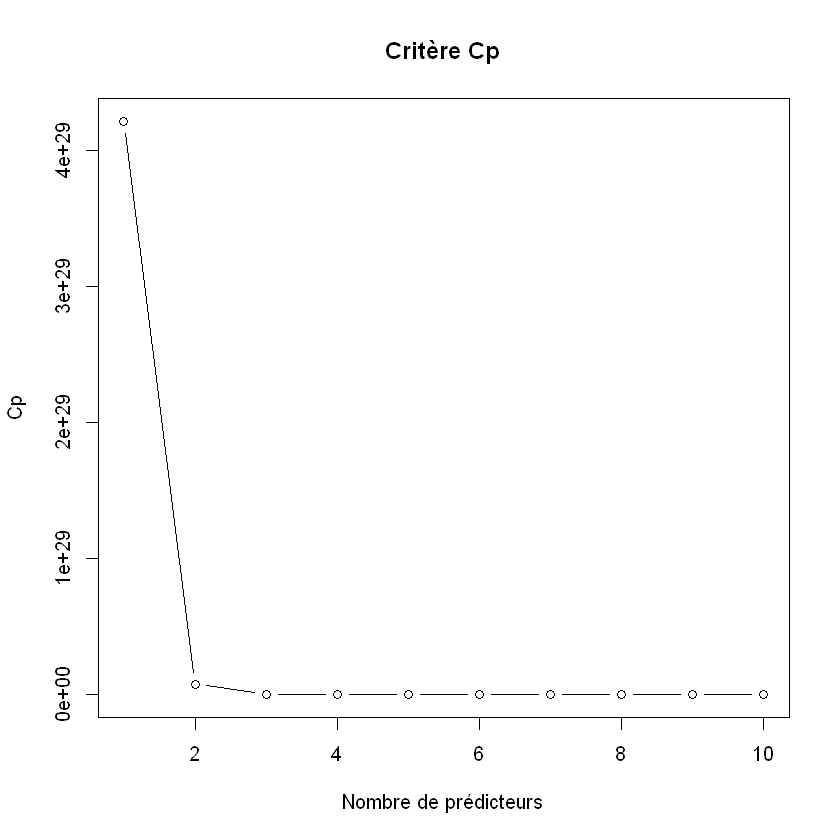

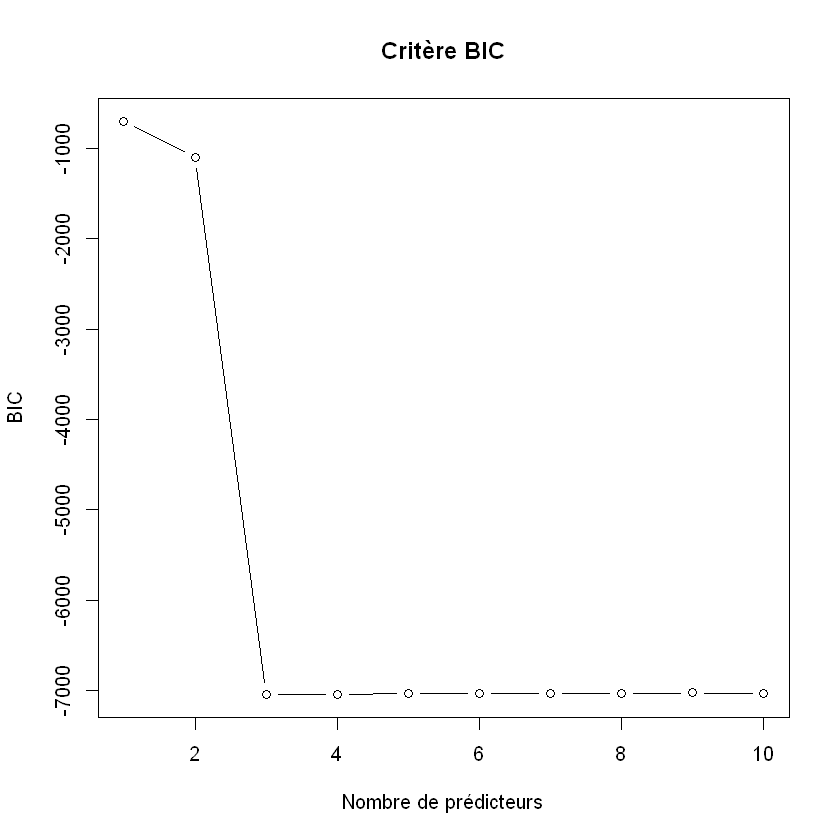

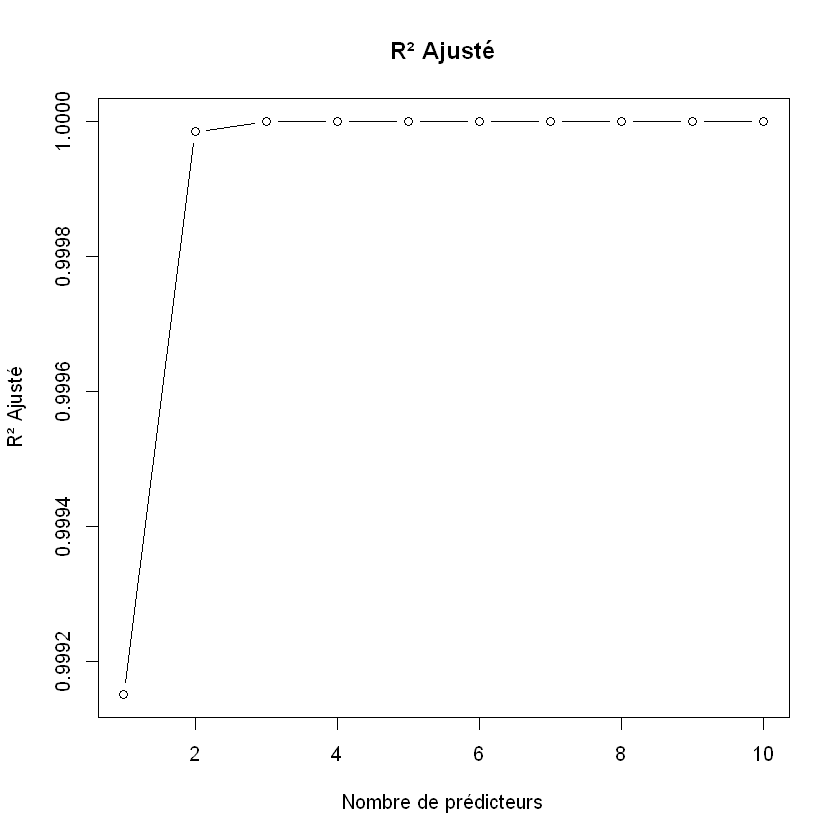

In [144]:
# Visualisation des critères
plot(summary_best$cp, type = "b", xlab = "Nombre de prédicteurs", ylab = "Cp", main = "Critère Cp")
plot(summary_best$bic, type = "b", xlab = "Nombre de prédicteurs", ylab = "BIC", main = "Critère BIC")
plot(summary_best$adjr2, type = "b", xlab = "Nombre de prédicteurs", ylab = "R² Ajusté", main = "R² Ajusté")

On observe que pour le critère \(C_p\), la valeur diminue drastiquement lorsque le modèle inclut jusqu'à 3 prédicteurs (\(X\), \(X^2\), \(X^3\)), avant de se stabiliser. Cela indique que l'ajout de prédicteurs supplémentaires n'améliore pas significativement la performance du modèle.

Pour le critère BIC, une tendance similaire est observée : la valeur atteint son minimum avec 3 prédicteurs, ce qui suggère que ce modèle offre un bon compromis entre complexité et qualité d'ajustement.

En ce qui concerne le \(R^2\) ajusté, celui-ci augmente rapidement pour atteindre une valeur proche de 1 avec 3 prédicteurs, indiquant que ce modèle explique quasiment toute la variance des données.

**Conclusion** : Le modèle optimal selon les critères \(C_p\), BIC et \(R^2\) ajusté est celui avec 3 prédicteurs (\(X\), \(X^2\), \(X^3\)). Ce modèle offre une balance idéale entre performance et simplicité.


### (e) : Sélection avec Forward et Backward Stepwise

In [145]:
# Forward Stepwise Selection
fit_forward <- regsubsets(y ~ ., data = mondata3_ext, nvmax = 10, method = "forward")

In [146]:
# Résumé des résultats
summary_forward <- summary(fit_forward)
print(summary_forward)

Subset selection object
Call: regsubsets.formula(y ~ ., data = mondata3_ext, nvmax = 10, method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" "*" " " " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" " " " " "*" " " " " " "
4  ( 1 )  "*" " " "*" "*" " " " " "*" " " " " " "
5  ( 1 )  "*" "*" "*" "*" " " " " "*" " " " " " "
6  ( 1 )  "*" "*" "*" "*" " " " " "*" " " " " "*"
7  ( 1 )  "*" "*" "*" "*" " " " " "*" " " "*" "*"
8  ( 1 )  "*" "*" "*" "*" "*" " " "*" " " "*" "*"
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " "*" "*"
10  ( 1 ) "*" "*" "*" "*"

In [147]:
# Backward Stepwise Selection
fit_backward <- regsubsets(y ~ ., data = mondata3_ext, nvmax = 10, method = "backward")

In [148]:
# Résumé des résultats
summary_backward <- summary(fit_backward)
print(summary_backward)

Subset selection object
Call: regsubsets.formula(y ~ ., data = mondata3_ext, nvmax = 10, method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " " "
5  ( 1 )  "*" "*" "*" " " " " " " "*" "*" " " " "
6  ( 1 )  "*" "*" "*" " " " " "*" "*" "*" " " " "
7  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" " " " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "

### Interprétation des résultats de Forward et Backward Stepwise Selection

On observe que pour la **méthode Forward Stepwise**, les prédicteurs sont ajoutés progressivement, et les résultats montrent que les premières variables incluses dans le modèle sont les plus significatives (\(X\), \(X^2\), \(X^3\)). À mesure que le nombre de variables augmente, les ajouts successifs n’apportent que peu d’améliorations significatives. Cela confirme que les prédicteurs principaux sont les mêmes que ceux identifiés précédemment avec les critères \(C_p\), BIC et \(R^2\) ajusté.

Pour la **méthode Backward Stepwise**, qui commence avec l’ensemble complet des prédicteurs, les variables sont éliminées une par une. Ici encore, on observe que les prédicteurs \(X\), \(X^2\), et \(X^3\) sont conservés dans les modèles finaux, ce qui est cohérent avec les conclusions tirées des autres critères.

### Comparaison avec les résultats obtenus en (c)

Les résultats obtenus ici avec les sélections Forward et Backward sont alignés avec ceux obtenus en (c) à l’aide des critères \(C_p\), BIC et \(R^2\) ajusté. Dans les deux cas, les prédicteurs \(X\), \(X^2\), et \(X^3\) sont identifiés comme les plus pertinents, offrant le meilleur compromis entre la complexité du modèle et sa performance.

---

### Conclusion

Les résultats des méthodes Forward et Backward Stepwise confirment que le modèle optimal inclut les prédicteurs \(X\), \(X^2\), et \(X^3\). Ces variables expliquent la majeure partie de la variance des données, et leur inclusion suffit pour atteindre une performance optimale tout en maintenant une simplicité du modèle. Les résultats sont cohérents avec ceux obtenus à l’aide des critères en (c), validant ainsi leur robustesse.


### (f) : Ajustement du modèle LASSO

In [149]:
install.packages("glmnet")

Installation du package dans 'C:/Users/gpres/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)

installation de la dépendance 'RcppEigen'




le package 'RcppEigen' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'glmnet' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\gpres\AppData\Local\Temp\RtmpqeiLK8\downloaded_packages


In [150]:
library(glmnet)

Warning message:
"le package 'glmnet' a été compilé avec la version R 4.4.2"
Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8



In [151]:
# Préparation des données pour LASSO
x_matrix <- as.matrix(mondata3_ext[, -1])
y_vector <- mondata3_ext$y

In [152]:
# Ajustement du modèle LASSO
fit_lasso <- cv.glmnet(x_matrix, y_vector, alpha = 1)

In [153]:
# Affichage du lambda optimal
print(fit_lasso$lambda.min)

[1] 2.441885


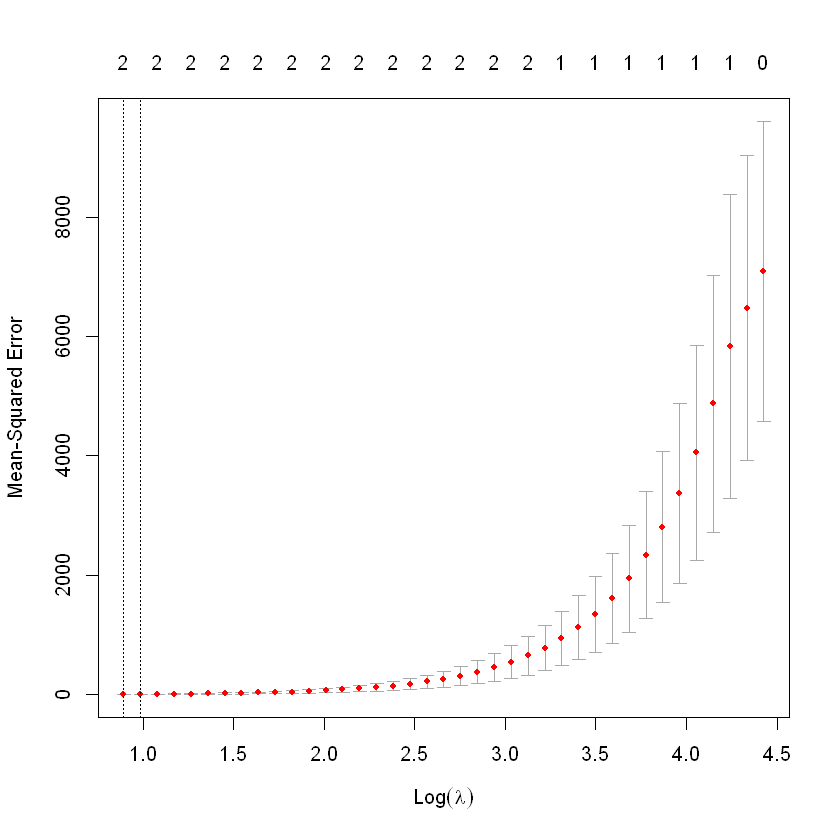

In [154]:
# Tracé de l'erreur de validation croisée
plot(fit_lasso)

In [155]:
# Coefficients pour le lambda optimal
coef(fit_lasso, s = fit_lasso$lambda.min)

11 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 3.901553211
X1          .          
X2          .          
X3          0.354737782
X4          0.005567988
X5          .          
X6          .          
X7          .          
X8          .          
X9          .          
X10         .          

### Interprétation

1. **Valeur de Lambda Optimal** :  
   Le lambda optimal, obtenu par validation croisée, est \( \lambda = 2.44 \). Cette valeur minimise l'erreur quadratique moyenne (Mean Squared Error - MSE) dans le modèle LASSO. Cela indique que ce niveau de régularisation est idéal pour éviter à la fois le surajustement et le sous-ajustement.

2. **Tracé de l'erreur de validation croisée** :  
   Le graphique montre une forte augmentation de l'erreur moyenne quadratique lorsque \( \log(\lambda) \) devient plus grand (régularisation plus forte). Cela signifie que des valeurs trop élevées de \( \lambda \) pénalisent trop les coefficients, rendant le modèle sous-ajusté. À l'inverse, des valeurs trop faibles de \( \lambda \) augmentent légèrement l'erreur en raison d'un surajustement.

3. **Coefficients associés au modèle optimal** :  
   Avec \( \lambda = 2.44 \), seuls deux prédicteurs (\(X_3\) et \(X_4\)) sont retenus avec des coefficients non nuls (\(0.3547\) et \(0.0056\) respectivement). Cela montre que le modèle LASSO a effectué une sélection de variables, éliminant les autres prédicteurs (\(X_1, X_2, X_5, \dots, X_{10}\)) en raison de leur faible contribution à la qualité du modèle.

---

### Conclusion

Le modèle LASSO, avec \( \lambda = 2.44 \), réduit la complexité en ne conservant que deux prédicteurs (\(X_3\) et \(X_4\)), tout en maintenant une performance optimale en termes d'erreur quadratique moyenne. Cette approche permet d'obtenir un modèle parcimonieux qui favorise l'interprétabilité sans sacrifier la précision.


### Nouvelle génération de Y

In [157]:
# Définition des nouveaux coefficients
beta_7 <- 1.5

# Nouvelle génération de Y
y_new <- beta_0 + beta_7 * x^7 + e

In [158]:
# Création du nouveau DataFrame
mondata3_new <- data.frame(x = x, y = y_new)

In [159]:
# Sélection des meilleurs modèles avec regsubsets
fit_best_new <- regsubsets(y ~ ., data = data.frame(
  y = mondata3_new$y,
  poly(mondata3_new$x, degree = 10, raw = TRUE)
), nvmax = 10)

In [160]:
# Résumé des résultats
summary_best_new <- summary(fit_best_new)
print(summary_best_new)

Subset selection object
Call: regsubsets.formula(y ~ ., data = data.frame(y = mondata3_new$y, 
    poly(mondata3_new$x, degree = 10, raw = TRUE)), nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " " " " " "*" " " " " " "
2  ( 1 )  "*" " " " " " " " " " " "*" " " " " " "
3  ( 1 )  "*" " " "*" " " " " " " "*" " " " " " "
4  ( 1 )  "*" " " " " "*" " " "*" "*" " " " " " "
5  ( 1 )  "*" "*" "*" "*" " " " " "*" " " " " " "
6  ( 1 )  "*" "*" "*" "*" "*" " " "*" " " " " " "
7  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " " " " "
8  ( 1 )  "*" " " "*" "*" " " "*" "*" "*" "*" "*"
9  ( 1 )  "*" "*" "*" 

### Interprétation

1. **Résumé des résultats de la sélection exhaustive** :
   - La méthode de sélection exhaustive teste toutes les combinaisons possibles de prédicteurs (X_1 à X_10) pour trouver le meilleur sous-ensemble qui explique au mieux la variable cible (y).
   - Le tableau montre les prédicteurs inclus dans les modèles de tailles différentes, de 1 à 10 variables. Les cases marquées avec `*` indiquent les variables sélectionnées pour chaque taille de modèle.

2. **Tendances observées** :
   - On constate que les variables (X_3), (X_4), et parfois (X_2) sont fréquemment sélectionnées dans les modèles optimaux pour différentes tailles. Cela indique qu'elles ont un impact significatif sur la variable cible (y).
   - Les variables (X_5) à (X_10), en revanche, apparaissent rarement ou pas du tout dans les modèles optimaux, ce qui suggère qu'elles ont une contribution négligeable à la performance globale.

---

### Conclusion

La sélection exhaustive confirme que seules quelques variables (X_3 et X_4), principalement, sont nécessaires pour construire un modèle performant. Ces résultats sont cohérents avec les conclusions précédentes obtenues par les méthodes de LASSO et de sélection pas-à-pas (forward et backward).
